This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es)

In this notebook we will:

1. Learn how to implement scatterplots diagrams 
2. Learn how to calculate covariance and correlation coefficients
3. Understand simple linear regression model in the matrix notation
4. Solve linear regression problems using:
    - [statsmodels](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html)
    - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)
    - [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress)
    

### Dataset 

What if we wanted to implement a product like [BBVA Valora](https://www.bbva.es/personas/experiencias/bbva-valora.html)?

Let's start with a realistic (but toy) example. The database we're going to use is the housing [House Sales in King COunty, USA](https://www.kaggle.com/harlfoxem/housesalesprediction) database . For each house, we have the following attributes, variables, characteristics or *features*

| Feature | description |
| - |- |
|*id*| house id|
| *date*| date
| *price*| price
| *bedrooms*| # bedrooms
| *bathrooms*| # bathrooms
| *sqtf_living*| living area (squared feet)
| *sqft_lot*| lot (squared feet)
| *floors*| # floors
| *waterfront*| indicates whether the property has access to a lake
| *view*| type of view (ordinal variable)
| *condition*| house condition(ordinal variable)
| *grade*| construction quality (ordinal variable)
| *sqft_above*| above-ground area (squared feet)
| *sqft_basement*| basement area (squared feet)
| *yr_built*| year of construction
| *yr_renovated*| year of renovation
| *zip_code*| zip code
| *lat*| latitude coordinate
| *long*| longitude coordinate
| *sqft_living15*| average living area from the 15 nearest neighbors	
| *sqft_lot15*| average lot living area from the 15 nearest neighbors	

# 0. Load data

In [1]:
# load libraries
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
house_data = pd.read_csv("./data/kc_house_data.csv") 

# Remove id and date 
house_data = house_data.drop(['id','date'], axis=1)

# Convert squared feet to squared meters
feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
house_data[feetFeatures] = house_data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

# Rename columns
feature_names = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                 'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                 'sqm_living15','sqm_lot15']
house_data.columns = feature_names

# Display dataframe
house_data.head()

price  bedrooms  bathrooms  sqm_living     sqm_lot  floors  waterfront  \
0  221900.0         3       1.00  109.625587  524.902176     1.0           0   
1  538000.0         3       2.25  238.760813  672.803816     2.0           0   
2  180000.0         2       1.00   71.535341  929.030400     1.0           0   
3  604000.0         4       3.00  182.089958  464.515200     1.0           0   
4  510000.0         3       2.00  156.077107  750.656563     1.0           0   

   view  condition  grade   sqm_above  sqm_basement  yr_built  yr_renovated  \
0     0          3      7  109.625587      0.000000      1955             0   
1     0          3      7  201.599597     37.161216      1951          1991   
2     0          3      6   71.535341      0.000000      1933             0   
3     0          5      7   97.548192     84.541766      1965             0   
4     0          3      8  156.077107      0.000000      1987             0   

   zip_code      lat     long  sqm_living15   sqm_lot15  
0     98178  47.5112 -122.257    124.490074  524.902176  
1     98125  47.7210 -122.319    157.006138  709.686323  
2     98028  47.7379 -122.233    252.696269  748.984308  
3     98136  47.5208 -122.393    126.348134  464.515200  
4     98074  47.6168 -122.045    167.225472  697.051509

# 1. Scatter plots

Scatter plots allow us to display values for two variables from a dataset. There are several ways to do this in Python:

- [Matplotlib](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)
- [Seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
- [Plotly](https://plotly.com/python/line-and-scatter/)


Let's represent the housing price with respect to another variable.

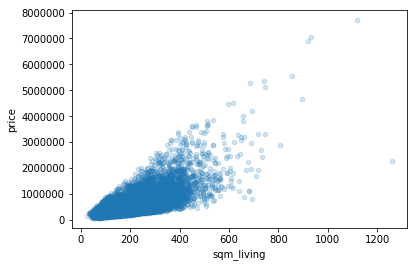

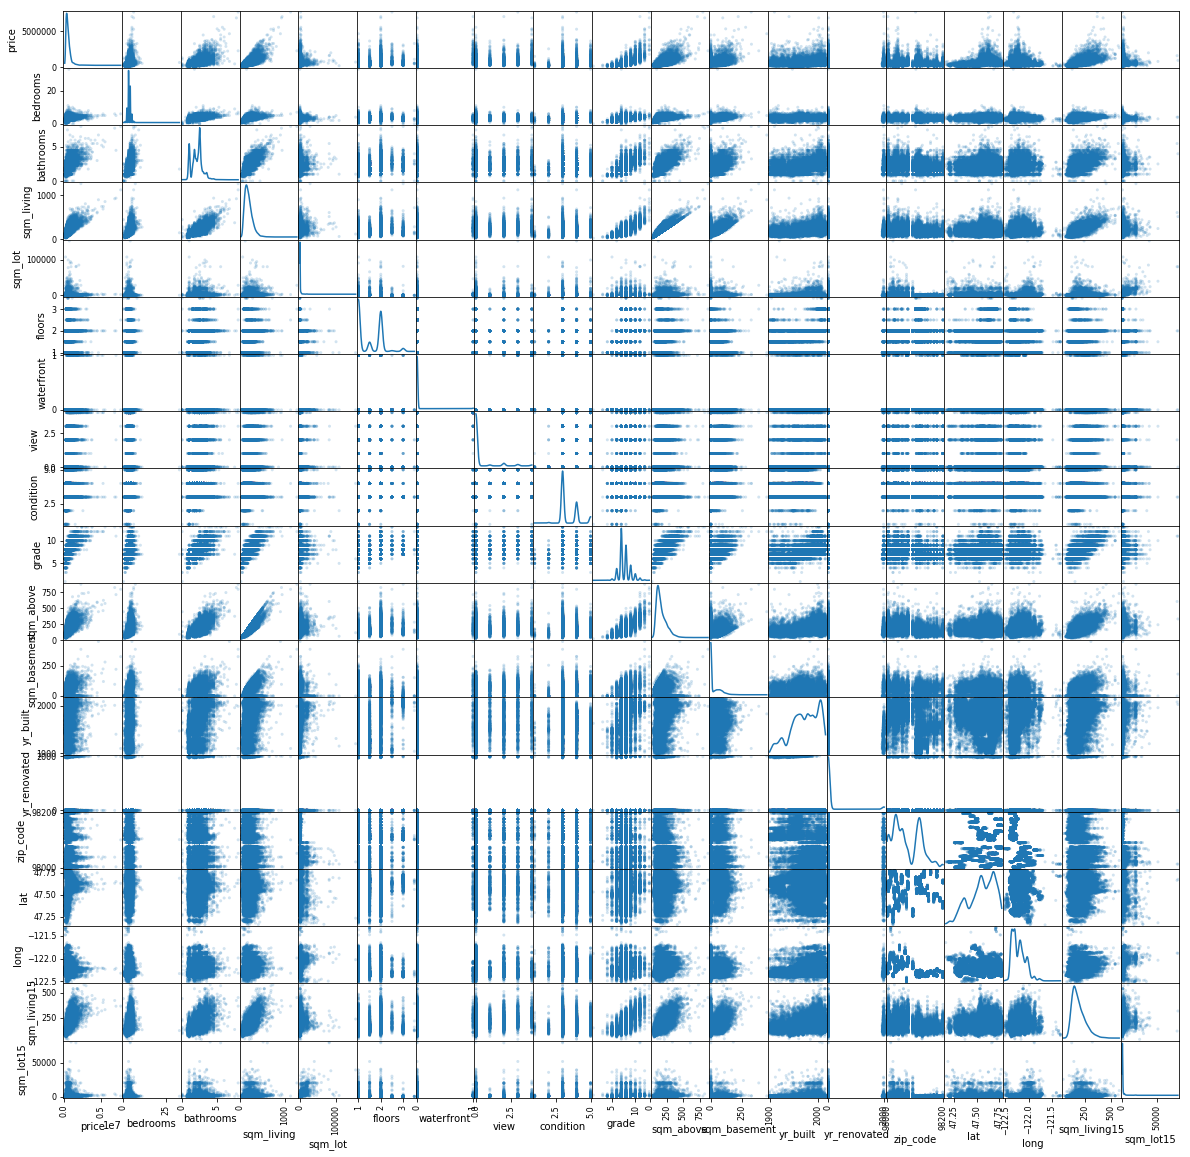

In [3]:
# pandas vs plotly
x_variable = 'sqm_living' # 'sqm_living', 'bedrooms', 'lat', 'grade'

#pandas
house_data.plot.scatter(x=x_variable,y='price',alpha=0.2)
plt.show()

#plotly
fig = px.scatter(house_data, x=x_variable, y="price",
                 marginal_y="histogram", marginal_x="histogram",
                 height=400, template = 'plotly_white')
fig.show()

# RUN THIS AT HOME
pd.plotting.scatter_matrix(house_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

# 2. Covariance and correlation

We can use:

- Pandas
- Numpy
- SciPy Stats

In [4]:
# Option 1: pandas
display(house_data[['price','sqm_living']].cov())
display(house_data[['price','sqm_living']].corr())

price    sqm_living
price       1.347824e+11  2.199158e+07
sqm_living  2.199158e+07  7.280518e+03

price  sqm_living
price       1.000000    0.702035
sqm_living  0.702035    1.000000

In [5]:
# Option 2: numpy
x = house_data['sqm_living']
y = house_data['price']
print('Covariance matrix:\n', np.cov(x,y))
print('Correlation matrix:\n',np.corrcoef(x,y))

Covariance matrix:
 [[7.28051798e+03 2.19915832e+07]
 [2.19915832e+07 1.34782378e+11]]
Correlation matrix:
 [[1.         0.70203505]
 [0.70203505 1.        ]]


In [6]:
# Option 3: scipy
from scipy.stats import pearsonr

print('Correlation Coefficient: ', pearsonr(x,y))

Correlation Coefficient:  (0.7020350546118002, 0.0)


### Correlation analysis for the complete dataset

This is just for illustration purposes, do not need to replicate it.

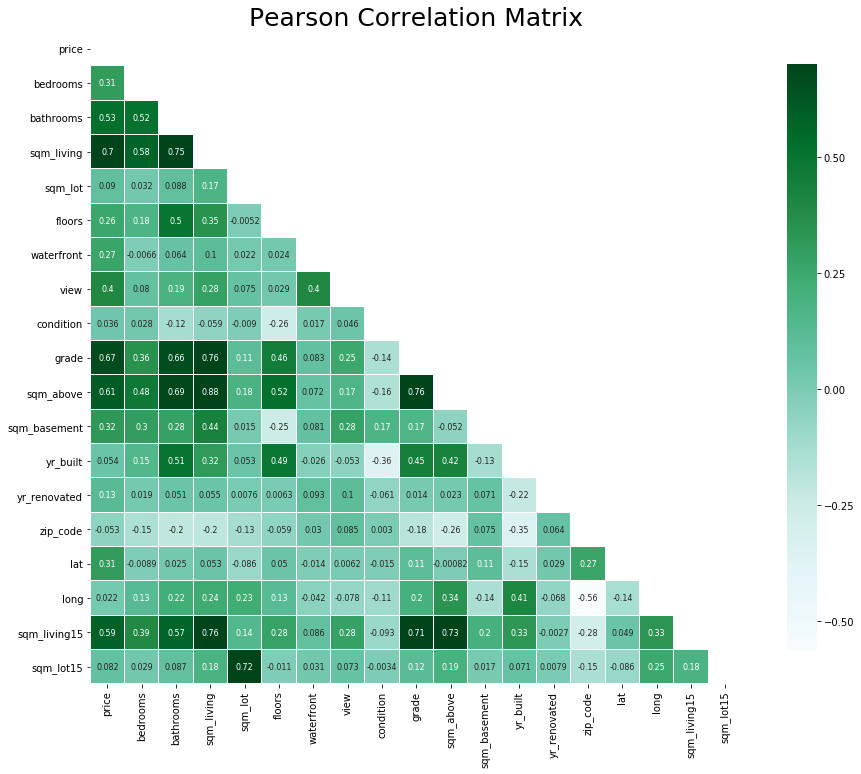

In [7]:
import seaborn as sns

mask = np.zeros_like(house_data[feature_names].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(house_data[feature_names].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

# 3. simple linear regression model in the matrix notation

The simple linear regression model assumes that

$$y_i = \beta_0 + \beta_1x_i + u_i,\quad i=1,\ldots,n$$

If we write one equation for each one of the observations, we have

$$
\begin{align}
    y1 & = \beta_0 + \beta_1x_1 + u_1 \\
    y2 & = \beta_0 + \beta_1x_2 + u_2 \\
    \vdots & =  \vdots \\
    y_n & = \beta_0 + \beta_1x_n + u_n 
\end{align}
$$

We can write the preceding equations in matrix form as

$$\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n \end{bmatrix} = \begin{bmatrix} 
    \beta_0 + \beta_1x_1 \\
    \beta_0 + \beta_1x_2 \\
    \vdots \\
    \beta_0 + \beta_1x_n 
\end{bmatrix} + \begin{bmatrix} 
    u_1 \\
    u_2 \\
    \vdots \\
    u_n \\
\end{bmatrix}
$$


And splitting the parameters $\beta$ from the variables $x_i$ 


$$\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n \end{bmatrix} = \begin{bmatrix} 
    1 & x_1 \\
    1 & x_2 \\
    \vdots & \vdots \\
    1 & x_n 
\end{bmatrix}\begin{bmatrix} 
    \beta_0 \\
    \beta_1 \\
\end{bmatrix} + \begin{bmatrix} 
    u_1 \\
    u_2 \\
    \vdots \\
    u_n \\
\end{bmatrix}
$$

And this relationship can be written as

$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta}+\mathbf{u}$$

where:

- $\mathbf{y}$: reponse vector
- $\mathbf{X} = [\mathbf{1} + \mathbf{x}]$: explanatory variables matrix
- $\boldsymbol{\beta}$: vector of parameters
- $\mathbf{u}$: error vector

### Least-squares estimation

It can be [proved](https://en.wikipedia.org/wiki/Ordinary_least_squares) that the vector of parameters can be estimated as 

$$\hat{\boldsymbol{\beta}}= (\mathbf X^{\rm T} \mathbf X )^{-1} \mathbf X^{\rm T} \mathbf y$$

so that 

$$\hat{\mathbf y} =\mathbf X \hat{\boldsymbol{\beta}}$$

In [8]:
n = x.shape[0]

X = np.matrix([np.ones(n), x]).T
y = np.matrix(y).T

# Solve least-squares
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta_hat)

[[-43580.74309448]
 [  3020.60694567]]


# 4. Solving a linear regression problem

There are several libraries that allow us to perform ordinary least squares estimates.

- [statsmodels](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html)
- [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)
- [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress)

## 4.1 Fitting the regression line

That is, estimate the values of $\beta_0$ and $\beta_1$

/Users/Felipe/.conda/envs/new_python_36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 07 May 2020   Prob (F-statistic):               0.00
Time:                        21:47:37   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqm_living  3020.6069     20.843    144.920      0.000    2979.753    3061.461
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                         523.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

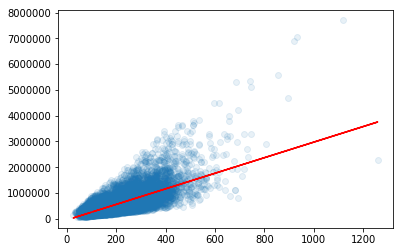

In [9]:
# OPTION 1: statsmodels
import statsmodels.api as sm

x = house_data['sqm_living']
y = house_data['price']

X     = sm.add_constant(x)
model = sm.OLS(y,X)

results = model.fit()
display(results.summary())

y_hat = results.predict(X)
plt.scatter(x,y,alpha=0.1)
plt.plot(x,y_hat,'r')
plt.show()

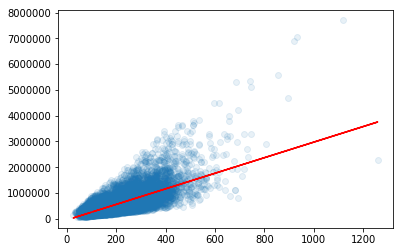

Intercept: 	beta_0 = -43580.74
Slope:		beta_1 = 3020.61


In [10]:
from sklearn.linear_model import LinearRegression

x = house_data['sqm_living'].values.reshape(-1, 1)
y = house_data['price'].values

lr = LinearRegression().fit(x, y)
y_hat = lr.predict(x)

plt.scatter(x,y,alpha=0.1)
plt.plot(x,y_hat,'r')
plt.show()

beta0 = lr.intercept_
beta1 = lr.coef_

print('Intercept: \tbeta_0 = %.2f' % beta0)
print('Slope:\t\tbeta_1 = %.2f' % beta1)

In [11]:
from scipy.stats import linregress

x = house_data['sqm_living']
y = house_data['price']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(slope, intercept, r_value**2, p_value, std_err)

3020.6069456655914 -43580.743094474194 0.4928532179037932 0.0 20.84322054476273


## 4.2 Prediction

What would be the estimated price for a `sqm_living` value of 800m$^2$?

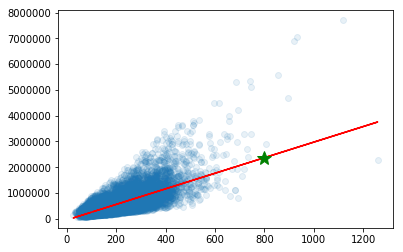

The estimated value is 2372904.81


In [12]:
sqm_living = 800
y_800 = results.predict([1, sqm_living])

y_hat = results.predict(X)
plt.scatter(x,y,alpha=0.1)
plt.plot(x,y_hat,'r')
plt.plot(sqm_living,y_800,'g*',markersize = 14)
plt.show()

print('The estimated value is', y_800[0].round(2))

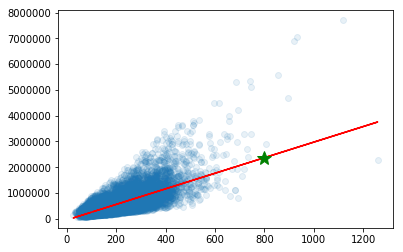

The estimated value is 2372904.81


In [13]:
x_new = np.array([800]).reshape(1, -1)
y_800 = lr.predict(x_new)

plt.scatter(x,y,alpha=0.1)
plt.plot(x,y_hat,'r')
plt.plot(x_new,y_800,'g*',markersize=14)
plt.show()

print('The estimated value is', y_800[0].round(2))

# 5. Exercises

All linear regression exercises are very similar. Given two variables $X$ and $Y$ from a dataset, the question to be addressed usually are:

1. Describe the relationship between $X$ and $Y$
2. Calculate the correlation coefficient for $X$ and $Y$ 
3. Do the data meet the conditions required for fitting a least squares line? In addition to the scatterplot,
use the residual plot and histogram to answer this question.
4. Write the equation of the regression line. Interpret the slope and intercept in context
5. Do the data provide strong evidence that an increase/decrease in $X$ is associated with an increase/decrease in $Y$? State the null and alternative hypotheses, report the p-value, and state your conclusion.
6. Calculate R$^2$ and interpret it in context
7. For a value of $x=x_0$, what would be the estimated $\hat{y}_0$ value? Is it reasonable? 

### Exercise 1

Data on US cancer mortality rates for over 3000 counties are available in the dataset `cancer_reg.csv`. Read the dataset into Python and use it to construct a regression model with `target_deathrate` as the response variable and candidate predictors: `povertypercent`, `studypercap`, `medianage`, `pctunemployed16_over`, `pctprivatecoverage`, `pctbachdeg25_over`.

The description of the dataset can be found [here](https://data.world/nrippner/ols-regression-challenge)

<div class="alert alert-block alert-info">
Find the best predictor for <b>target_deathrate</b> taking into account the above considerations
</div>

In [15]:
df = pd.read_csv('./data/cancer_reg.csv',sep=',', decimal = '.', encoding='latin-1')

features = ['target_deathrate','povertypercent','studypercap','medianage',
            'pctunemployed16_over','pctprivatecoverage','pctbachdeg25_over']

cancer_data = df[features]
cancer_data = cancer_data.dropna()
cancer_data.head()

target_deathrate  povertypercent  studypercap  medianage  \
0             164.9            11.2   499.748204       39.3   
1             161.3            18.6    23.111234       33.0   
2             174.7            14.6    47.560164       45.0   
3             194.8            17.1   342.637253       42.8   
4             144.4            12.5     0.000000       48.3   

   pctunemployed16_over  pctprivatecoverage  pctbachdeg25_over  
0                   8.0                75.1               19.6  
1                   7.8                70.2               22.7  
2                   7.0                63.7               16.0  
3                  12.1                58.4                9.3  
4                   4.8                61.6               15.0

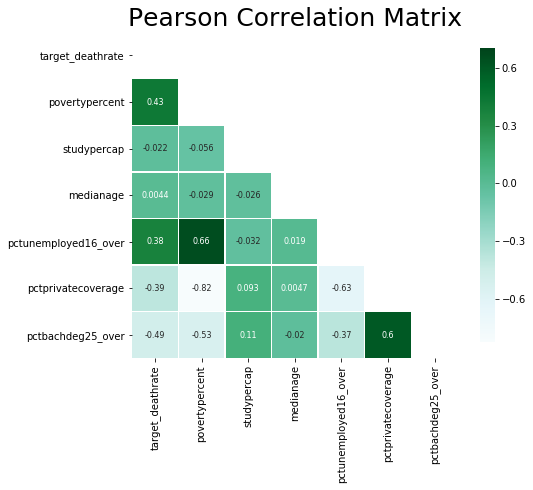

In [18]:
# your code here
# ...

mask = np.zeros_like(cancer_data[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(8, 6))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(cancer_data[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

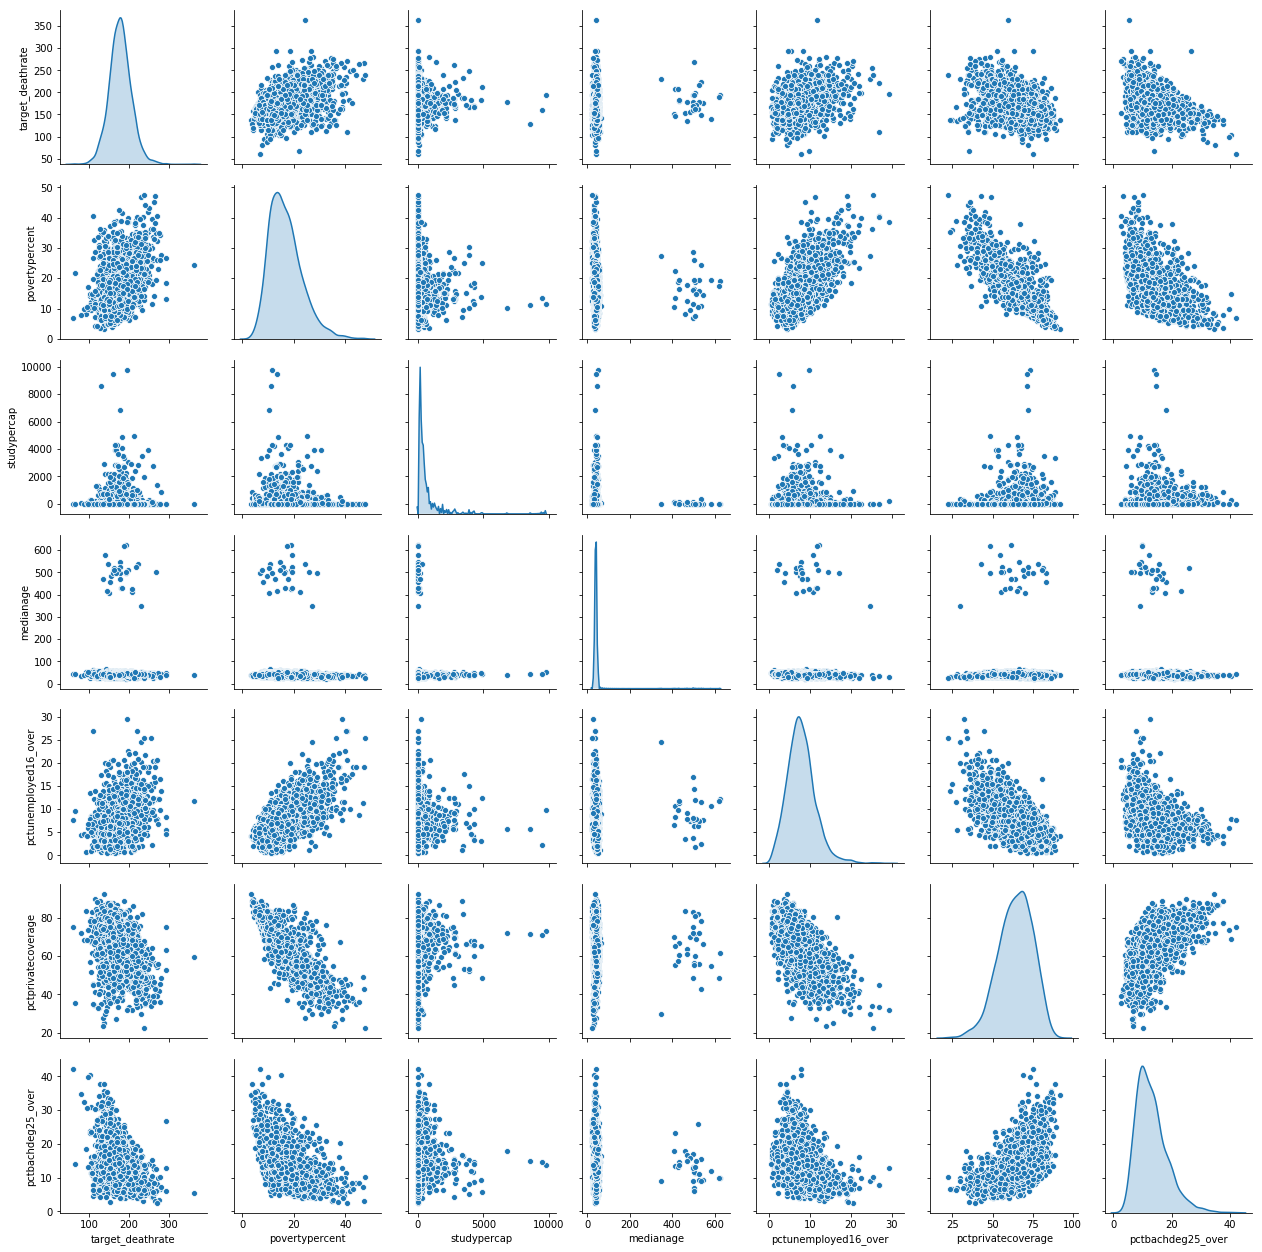

In [24]:
sns.pairplot(cancer_data, diag_kind = 'kde')
plt.show()

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

cancer_model = ols("target_deathrate ~ pctbachdeg25_over", data=cancer_data).fit()
cancer_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       target_deathrate   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     939.0
Date:                Thu, 07 May 2020   Prob (F-statistic):          5.66e-180
Time:                        21:58:59   Log-Likelihood:                -14040.
No. Observations:                3047   AIC:                         2.808e+04
Df Residuals:                    3045   BIC:                         2.810e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           211.8342      1.168    181.312      0.000     209.543     214.125
pctbachdeg25_over    -2.4974      0.081    -30.643      0.000      -2.657      -2.338
==============================================================================
Omnibus:                      151.528   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.041
Skew:                           0.045   Prob(JB):                    5.99e-120
Kurtosis:                       5.078   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

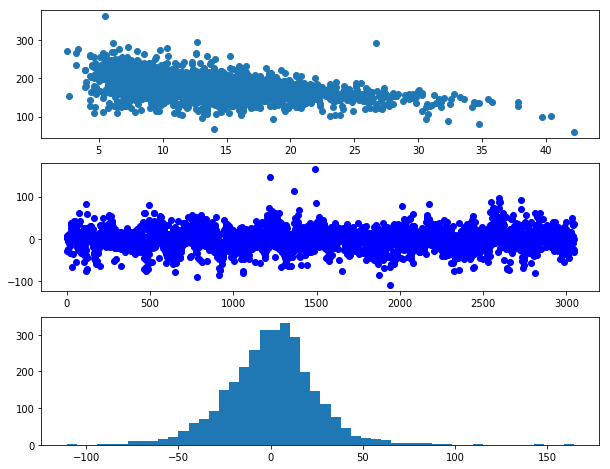

In [37]:
plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
plt.scatter(cancer_data.pctbachdeg25_over, cancer_data.target_deathrate)
plt.subplot(3,1,2)
plt.plot(cancer_model.resid,'bo')
plt.subplot(3,1,3)
plt.hist(cancer_model.resid, bins=50)
plt.show()

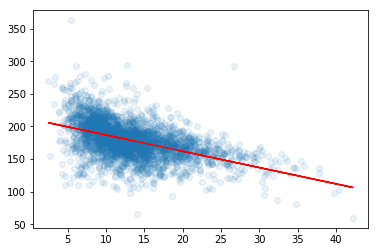

In [39]:
x = cancer_data.pctbachdeg25_over
y = cancer_data.target_deathrate
y_hat = cancer_model.predict(x)
plt.scatter(x,y,alpha=0.1)
plt.plot(x,y_hat,'r')
plt.show()

### Exercise 2

In a 2015 [paper](https://www.sciencedirect.com/science/article/pii/S0040162514001656) comparing technological advancement of hybrid electric vehicles (HEV) in different market segments, authors Lim et al. collected data on prices and other features for 154 HEV models. The dataset is in the file `hybrid_reg.cs` and contains the following variables:
- *carid*: Vehicle ID
- *vehicle*: Make of vehicle
- *year*: Model year
- **msrp**: Manufacturer’s suggested retail price in 2013 (US dollars).
- *accelrate*: Acceleration rate in km/hour/second
- *mpg*: Fuel economy in miles/gallon
- *mpgmpge*: Max of mpg and mpge (mpge is miles per gallon equivalent for plug-in HEVs to take into account the all electric range)
- *carclass*: Model class. C = Compact, M = Midsize, TS = 2 Seater, L = Large, PT = Pickup Truck, MV = Minivan, SUV = Sport Utility Vehicle 
- *carclass_id*: Index representing model class

The variables `carid` and `vehicle` are vehicle identifiers and will not be used in the analysis. Likewise `carclass` will not be used as it is better to use the numerical form of the variable `carclass_id`.

<div class="alert alert-block alert-info">
Find the best predictor for <b>msrp</b> taking into account the above considerations
</div>

In [ ]:
df = pd.read_csv('./data/hybrid_reg.csv',sep=',', decimal = '.', encoding='latin-1')
hybrid_data = df.drop(columns = ['carid','vehicle','carclass'])

hybrid_data.head()

In [ ]:
# your code here
# ...